<a href="https://colab.research.google.com/github/Issey2023/Data-Enrichment-Project-3/blob/main/Project_3_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis Testing

**Student: Ismaa-eel Hendicks**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm_notebook
import scipy.stats as stats

In [ ]:
import os
Folder = 'Data/'
file_list = sorted(os.listdir(Folder))
file_list

['final_tmdb_data_-20.csv.gz',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'final_tmdb_data_False.csv.gz',
 'title_akas.csv.gz',
 'title_basics.csv.gz',
 'title_ratings.csv.gz',
 'tmdb_api_results_-20.json',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json',
 'tmdb_api_results_2005.json',
 'tmdb_api_results_False.json']

In [ ]:
import glob
#Make a filepath query
q = 'Data/**/final*.csv.gz'
file_list = sorted(glob.glob(q,recursive=True))
file_list

['Data\\final_tmdb_data_-20.csv.gz',
 'Data\\final_tmdb_data_2000.csv.gz',
 'Data\\final_tmdb_data_2001.csv.gz',
 'Data\\final_tmdb_data_False.csv.gz']

In [ ]:

pd.read_csv(file_list[0])

,imdb_id
0,0


In [ ]:

df = pd.concat([pd.read_csv(file, lineterminator='\n') for file in file_list])
df = df.reset_index(drop=True)

df

,imdb_id\r,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification\r
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,\r
2,NaN,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,\r
3,NaN,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,\r
4,NaN,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.0,1.0,\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499,NaN,tt7797790,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956219.0,en,...,0.0,72.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,NaN,Edmund Kemper Part 3: La mort sévit,0.0,0.0,0.0,\r
2500,NaN,tt8665056,0.0,NaN,NaN,0.0,"[{'id': 37, 'name': 'Western'}]",http://skeletoncreekproductions.com/p-movie-br...,885436.0,en,...,0.0,85.0,[],Released,Evil came to the Southwest until three blazing...,Guns Along The Bravo,0.0,0.0,0.0,\r
2501,NaN,tt8795764,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",https://www.utahwolf.com/films/coming-soon-new...,871624.0,en,...,0.0,57.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,New Breed,0.0,0.0,0.0,NR\r
2502,NaN,tt9071078,0.0,NaN,NaN,0.0,"[{'id': 28, 'name': 'Action'}]",http://www.hkcinemagic.com/en/movie.asp?id=6627,201706.0,cn,...,0.0,90.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,Chinese Heroes,0.0,3.0,2.0,\r


In [ ]:
df = df.loc[df['imdb_id']!='0']
df

,imdb_id\r,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification\r
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,\r
3,NaN,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,\r
4,NaN,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,\r
5,NaN,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.113,2012.0,PG\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499,NaN,tt7797790,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956219.0,en,...,0.0,72.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,NaN,Edmund Kemper Part 3: La mort sévit,0.0,0.000,0.0,\r
2500,NaN,tt8665056,0.0,NaN,NaN,0.0,"[{'id': 37, 'name': 'Western'}]",http://skeletoncreekproductions.com/p-movie-br...,885436.0,en,...,0.0,85.0,[],Released,Evil came to the Southwest until three blazing...,Guns Along The Bravo,0.0,0.000,0.0,\r
2501,NaN,tt8795764,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",https://www.utahwolf.com/films/coming-soon-new...,871624.0,en,...,0.0,57.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,New Breed,0.0,0.000,0.0,NR\r
2502,NaN,tt9071078,0.0,NaN,NaN,0.0,"[{'id': 28, 'name': 'Action'}]",http://www.hkcinemagic.com/en/movie.asp?id=6627,201706.0,cn,...,0.0,90.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,Chinese Heroes,0.0,3.000,2.0,\r


In [ ]:
drop_cols = ['backdrop_path','backdrop_path','original_title','overview',
                 'poster_path','status','tagline','id','homepage',
                 'production_countries','video','production_companies','spoken_languages',
            'original_language']
df = df.drop(columns=drop_cols)
df

,imdb_id\r,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification\r
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,tt0113026,0.0,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.526,2000-09-22,0.0,86.0,The Fantasticks,5.500,22.0,\r
3,NaN,tt0113092,0.0,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",2.423,2000-11-15,0.0,100.0,For the Cause,5.100,8.0,\r
4,NaN,tt0116391,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.629,2000-04-14,0.0,152.0,Gang,4.000,1.0,\r
5,NaN,tt0118694,0.0,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",20.284,2000-09-29,12854953.0,99.0,In the Mood for Love,8.113,2012.0,PG\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499,NaN,tt7797790,0.0,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",0.600,2001-01-01,0.0,72.0,Edmund Kemper Part 3: La mort sévit,0.000,0.0,\r
2500,NaN,tt8665056,0.0,NaN,0.0,"[{'id': 37, 'name': 'Western'}]",0.600,2001-10-10,0.0,85.0,Guns Along The Bravo,0.000,0.0,\r
2501,NaN,tt8795764,0.0,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",0.600,2001-01-01,0.0,57.0,New Breed,0.000,0.0,NR\r
2502,NaN,tt9071078,0.0,NaN,0.0,"[{'id': 28, 'name': 'Action'}]",2.289,2001-07-12,0.0,90.0,Chinese Heroes,3.000,2.0,\r


In [ ]:
#check for duplicates
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
#check for missing
df.isna().sum()

imdb_id\r                2500
imdb_id                     1
adult                       1
belongs_to_collection    2304
budget                      1
genres                      1
popularity                  1
release_date               17
revenue                     1
runtime                     1
title                       1
vote_average                1
vote_count                  1
certification\r             1
dtype: int64

In [ ]:
df = df.dropna(subset=['release_date'])
df.isna().sum()

imdb_id\r                2484
imdb_id                     0
adult                       0
belongs_to_collection    2287
budget                      0
genres                      0
popularity                  0
release_date                0
revenue                     0
runtime                     0
title                       0
vote_average                0
vote_count                  0
certification\r             0
dtype: int64

In [ ]:
df = df.rename(columns ={'certificiation\r':'certification'})
df.head()

,imdb_id\r,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification\r
2,NaN,tt0113026,0.0,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.526,2000-09-22,0.0,86.0,The Fantasticks,5.500,22.0,\r
3,NaN,tt0113092,0.0,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",2.423,2000-11-15,0.0,100.0,For the Cause,5.100,8.0,\r
4,NaN,tt0116391,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",0.629,2000-04-14,0.0,152.0,Gang,4.000,1.0,\r
5,NaN,tt0118694,0.0,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",20.284,2000-09-29,12854953.0,99.0,In the Mood for Love,8.113,2012.0,PG\r
6,NaN,tt0118852,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",3.944,2000-09-02,0.0,99.0,Chinese Coffee,6.900,47.0,R\r


In [ ]:
# there are 3,700+ movies that belong to collections
df['belongs_to_collection'].value_counts()

{'id': 432207, 'name': 'The Sex Files', 'poster_path': None, 'backdrop_path': None}                                                                                   7
{'id': 403643, 'name': 'Troublesome Night Collection', 'poster_path': '/bPTx3TP4UJTHQfcLx4qIub9LXmi.jpg', 'backdrop_path': '/n3a7zF5GuxM2X8oPF6pKXqYS6ER.jpg'}        6
{'id': 39244, 'name': 'Digimon Collection', 'poster_path': '/eeHgXzsLtX7UqaBXSgxtnTqRQJK.jpg', 'backdrop_path': '/vfwyCkgzgoQ1l0trt7wIr77VL4Q.jpg'}                   3
{'id': 148065, 'name': 'Doraemon Collection', 'poster_path': '/4TLSP1KD1uAlp2q1rTrc6SFlktX.jpg', 'backdrop_path': '/rc6OFcSasL5YxBRPUQVwxmVF6h5.jpg'}                 2
{'id': 374512, 'name': 'Godzilla (Millennium) Collection', 'poster_path': '/v9fV11I7KVP9xa6UWvW2YlGtErD.jpg', 'backdrop_path': '/hhUQwi9Z7wE2kwwC1AM1AE418oU.jpg'}    2
                                                                                                                                                                

In [ ]:
df['belongs_to_collection'] = df['belongs_to_collection'].notna()
df['belongs_to_collection'].value_counts()

False    2287
True      197
Name: belongs_to_collection, dtype: int64

In [ ]:
## Checking Certification values
df['certification\r'].value_counts(dropna=False)

\r           1687
R\r           452
PG-13\r       181
NR\r           68
PG\r           64
G\r            24
NC-17\r         6
Unrated\r       1
-\r             1
Name: certification\r, dtype: int64

In [ ]:
# fix extra space certs
df['certification\r'] = df['certification\r'].str.strip()
df['certification\r'].value_counts(dropna=False)

           1687
R           452
PG-13       181
NR           68
PG           64
G            24
NC-17         6
Unrated       1
-             1
Name: certification\r, dtype: int64

In [ ]:
replace_certif = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '12':np.nan,
             '':np.nan,
             'ScreamFest Horror Film Festival':'NR'}
df['certification\r'] = df['certification\r'].replace(replace_certif)
df['certification\r'].value_counts(dropna=False)

NaN      1687
R         452
PG-13     181
NR         70
PG         64
G          24
NC-17       6
Name: certification\r, dtype: int64

In [ ]:
df = df.dropna(subset=['certification\r'])

In [ ]:
df = df.drop(columns=['release_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 5 to 2501
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
               0 non-null      float64
 1   imdb_id                797 non-null    object 
 2   adult                  797 non-null    float64
 3   belongs_to_collection  797 non-null    bool   
 4   budget                 797 non-null    float64
 5   genres                 797 non-null    object 
 6   popularity             797 non-null    float64
 7   revenue                797 non-null    float64
 8   runtime                797 non-null    float64
 9   title                  797 non-null    object 
 10  vote_average           797 non-null    float64
 11  vote_count             797 non-null    float64
         797 non-null    object 
dtypes: bool(1), float64(8), object(4)
memory usage: 81.7+ KB


# Question 1: Does the MPAA rating of a movie affect how much revenue the movie generates?

- Null Hypothesis: The MPAA rating of a movie has no affect on how much revenue the movie generates.

- Alternate Hypothesis: The MPAA rating of a movie has an affect on how much revenue the movie generates.

- Alpha = 0.05

- we are dealing with multiple choices in the set we will be using an ANOVA test.


C:\Users\Aaron\anaconda3\envs\dojo-env\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Aaron\anaconda3\envs\dojo-env\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


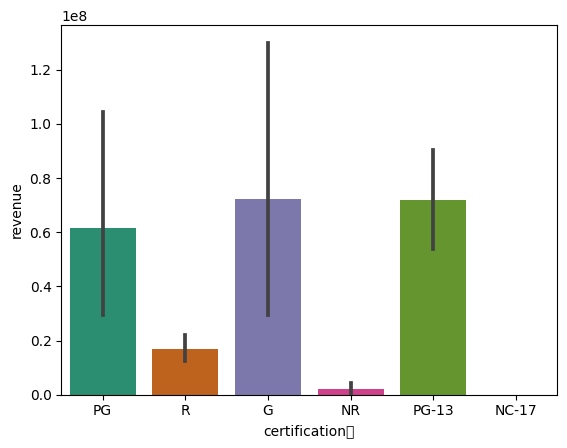

In [ ]:
sns.barplot(data=df, x = 'certification\r', y='revenue', palette= 'Dark2');

In [ ]:
stats.levene(*groups.values())

LeveneResult(statistic=15.694580878247626, pvalue=9.480207515647656e-15)

In [ ]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.kruskal( *groups.values())
result

KruskalResult(statistic=109.77235685278664, pvalue=4.577283750003357e-22)

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
values = df['revenue']
labels = df['certification\r']

In [ ]:
# check for outliers
values_outliers = np.abs(stats.zscore(values)) > 3

#How many outliers?
values_outliers.sum()

19

In [ ]:
len(values_outliers)

797

In [ ]:
values_cln = values[values_outliers==False]
values_cln

5       12854953.0
6              0.0
7              0.0
8              0.0
12         14904.0
           ...    
2454           0.0
2456           0.0
2460           0.0
2485           0.0
2501           0.0
Name: revenue, Length: 778, dtype: float64

In [ ]:
#remove outliers
labels_cln = labels[labels_outliers==False]
labels_cln

5          PG
6           R
7           R
8           R
12          R
        ...  
2454        G
2456    PG-13
2460    PG-13
2485       NR
2501       NR
Name: certification\r, Length: 778, dtype: object

In [ ]:
tukeys_results = pairwise_tukeyhsd(values_cln,labels_cln)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,NC-17,-50096170.6957,0.2163,-113705946.1213,13513604.73,False
G,NR,-47937748.9671,0.0006,-81287526.6236,-14587971.3105,True
G,PG,-20627105.9957,0.5111,-54657259.6105,13403047.6192,False
G,PG-13,-4182254.1276,0.9989,-35021784.1195,26657275.8643,False
G,R,-35015955.7312,0.0101,-64679620.3311,-5352291.1313,True
NC-17,NR,2158421.7286,1.0,-56868013.7364,61184857.1936,False
NC-17,PG,29469064.7,0.7167,-29944433.5055,88882562.9055,False
NC-17,PG-13,45913916.568,0.2054,-11731456.3953,103559289.5314,False
NC-17,R,15080214.9644,0.9747,-41944739.3227,72105169.2516,False
NR,PG,27310642.9714,0.0181,2898188.997,51723096.9459,True
